# Importing Dataset and cleaning 

In [1]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv("fraudTest.csv")
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

# Replace gender (possible cases) value with 0 and 1
# 0 represent female and 1 represent male
df['gender'] = df['gender'].str.lower()

# Replace values based on conditions
df['gender'] = df['gender'].apply(lambda x: 1 if x.startswith('m') else (0 if x.startswith('f') else None))

print(df)

        Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       frau

## Identifying and replacing blank or empty spaces

In [2]:
for col in df.columns:
    # Check if the column is of type 'object' (typically strings)
    if df[col].dtype == 'object':
        # Clean each value in the column based on the specified pattern
        df[col] = df[col].apply(lambda x: re.sub(r'[^A-Za-z0-9]', '', str(x)))
        # Replace values with 'NaN' where the cleaned string length is <= 1
        df.loc[df[col].str.len() <= 1, col] = 'NaN'
df


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraudKirlinandSons,personalcare,2.86,Jeff,Elliott,1,351DarleneGreen,...,33.9659,-80.9355,333497,Mechanicalengineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraudSporerKeebler,personalcare,29.84,Joanne,Williams,0,3638MarshUnion,...,40.3207,-110.4360,302,SalesprofessionalIT,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,fraudSwaniawskiNitzscheandWelch,healthfitness,41.28,Ashley,Lopez,0,9333ValentinePoint,...,40.6729,-73.5365,34496,Librarianpublic,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraudHaleyGroup,miscpos,60.05,Brian,Williams,1,32941KrystalMillApt552,...,28.5697,-80.8191,54767,Setdesigner,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraudJohnstonCasper,travel,3.19,Nathan,Massey,1,5783EvanRoadsApt465,...,44.2529,-85.0170,1126,Furnituredesigner,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraudReillyandSons,healthfitness,43.77,Michael,Olson,1,558MichaelEstates,...,40.4931,-91.8912,519,Townplanner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraudHoppeParisian,kidspets,111.84,Jose,Vasquez,1,572DavisMountains,...,29.0393,-95.4401,28739,Futurestrader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraudRauRobel,kidspets,86.88,Ann,Lawson,0,144EvansIslandsApt683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraudBreitenbergLLC,travel,7.99,Eric,Preston,1,7020DoyleStreamApt951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [11]:
## Remove columns starting with 'Unnamed'
unnamed_columns = [col for col in df.columns if col.startswith('Unnamed')]
df1 = df.drop(columns=unnamed_columns, errors='ignore')

## Display the dataset after removing unnamed columns
print("\nDataset after removing unnamed columns:")
print(df1)


Dataset after removing unnamed columns:
       trans_date_trans_time            cc_num  \
0        2020-06-21 12:14:25  2291163933867244   
1        2020-06-21 12:14:33  3573030041201292   
2        2020-06-21 12:14:53  3598215285024754   
3        2020-06-21 12:15:15  3591919803438423   
4        2020-06-21 12:15:17  3526826139003047   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                               merchant       category     amt    first  \
0                    fraudKirlinandSons   personalcare    2.86     Jeff   
1                    fraudSporerKeebler   personalcare   29.84   Joanne   
2       fraudSwaniawskiNitzscheandWelch  healthfitness   41.28   Ashley   
3                       fraudHaleyGroup        miscpos   6

### Question 1: Comparison of fraud and non-fraud transactions

<Axes: xlabel='is_fraud'>

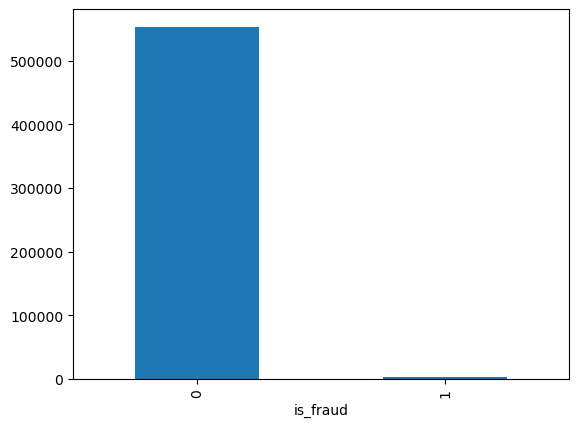

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
df1.groupby('is_fraud').count()['cc_num'].plot.bar()

### Question 2: Distribution of transaction amounts

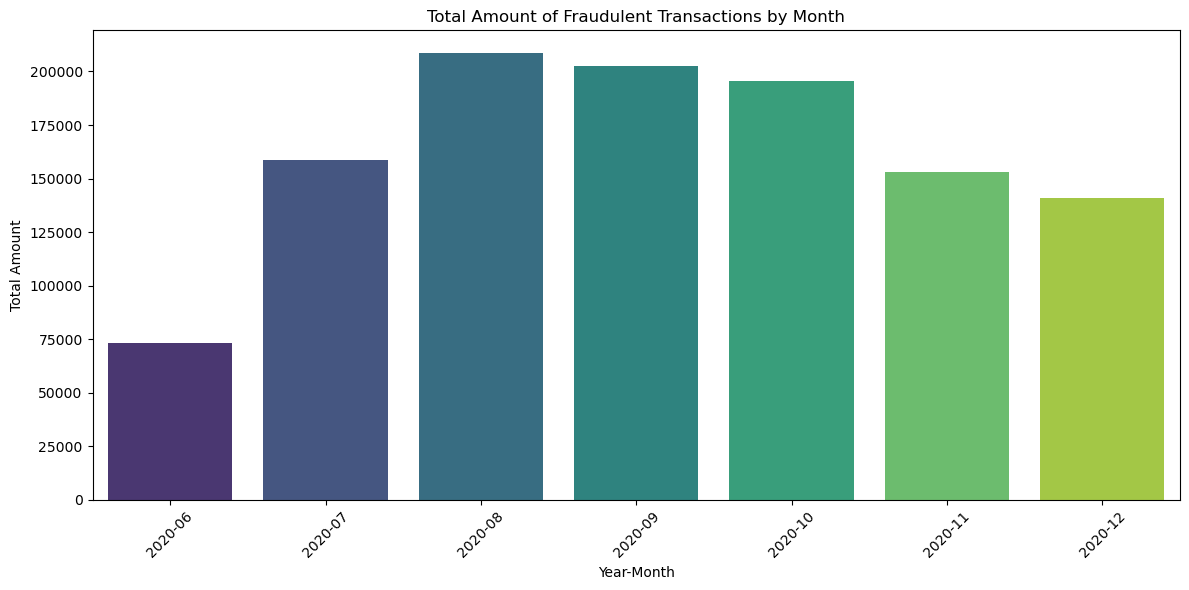

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'trans_date_trans_time' is in datetime format
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])

# Extract year and month from the transaction date
df1['year_month'] = df['trans_date_trans_time'].dt.to_period('M')

# Filter for fraudulent transactions
fraudulent_df1 = df1[df1['is_fraud'] == 1]

# Group by year_month and sum the transaction amounts
fraudulent_amounts = fraudulent_df1.groupby('year_month')['amt'].sum().reset_index()

# Plotting the total fraudulent transaction amounts across each month
plt.figure(figsize=(12, 6))
sns.barplot(x='year_month', y='amt', data=fraudulent_amounts, palette='viridis')
plt.title('Total Amount of Fraudulent Transactions by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Question 3: Number of transactions by category

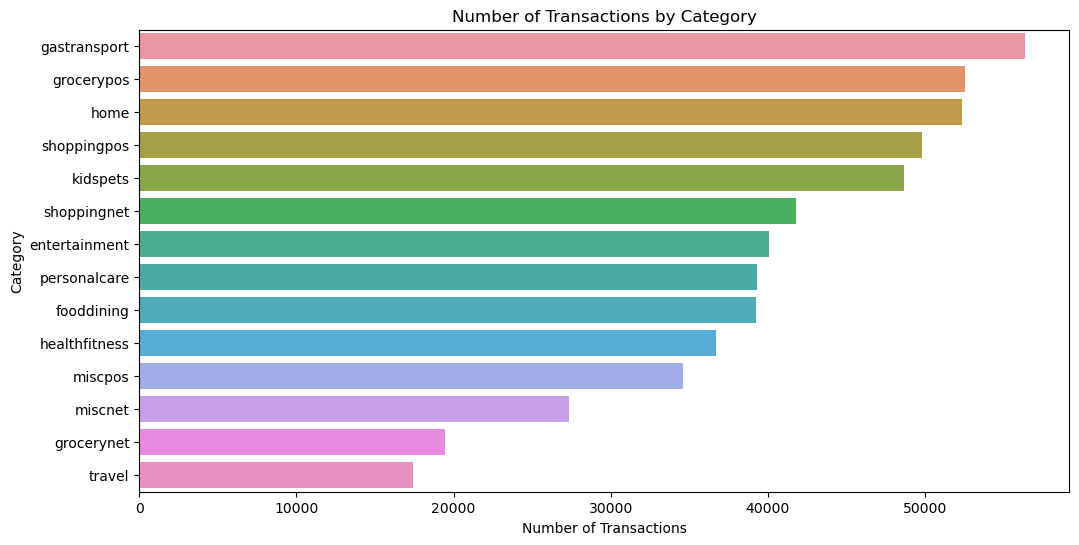

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=df1, order=df1['category'].value_counts().index)
plt.title('Number of Transactions by Category')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()

### Question 4: Correlation between numerical features

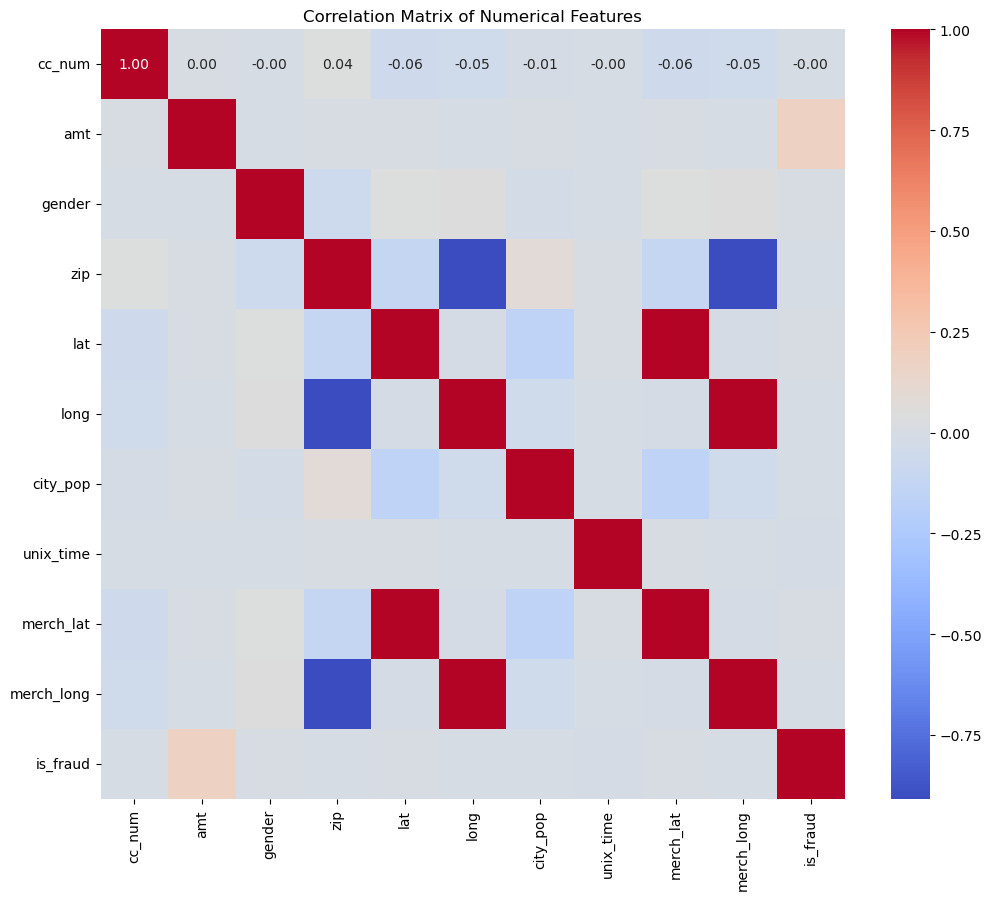

In [14]:


# Calculate the correlation matrix
correlation_matrix = df1.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Question 5: Demographic breakdown (age and gender)

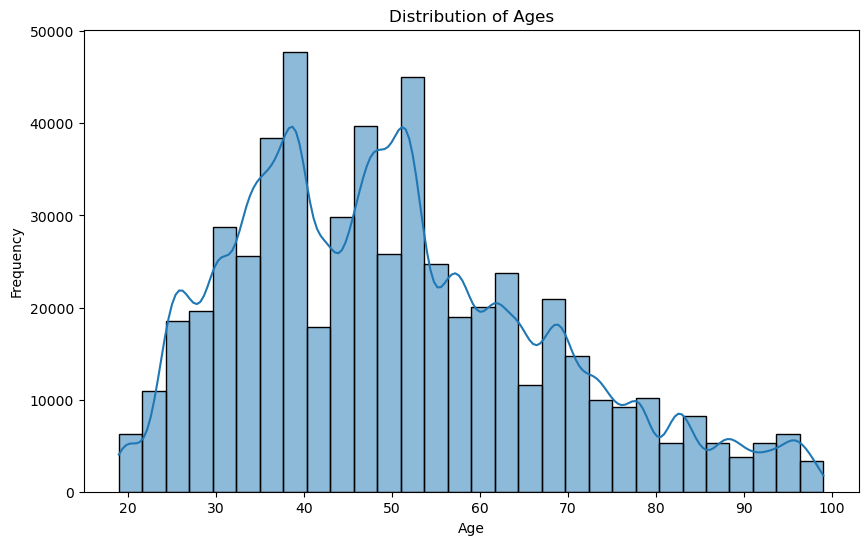

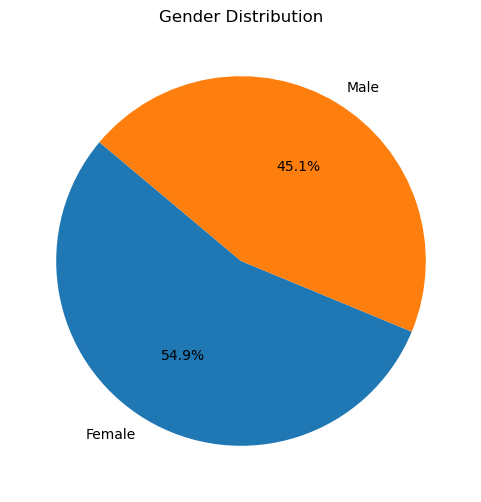

In [44]:
# Create a column for age
df1['age'] = (pd.to_datetime('today') - df1['dob']).dt.days // 365
plt.figure(figsize=(10, 6))
sns.histplot(df1['age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 6))
gender_counts = df1['gender'].value_counts()
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

### Question 6: Relationship between transaction amount and customer age

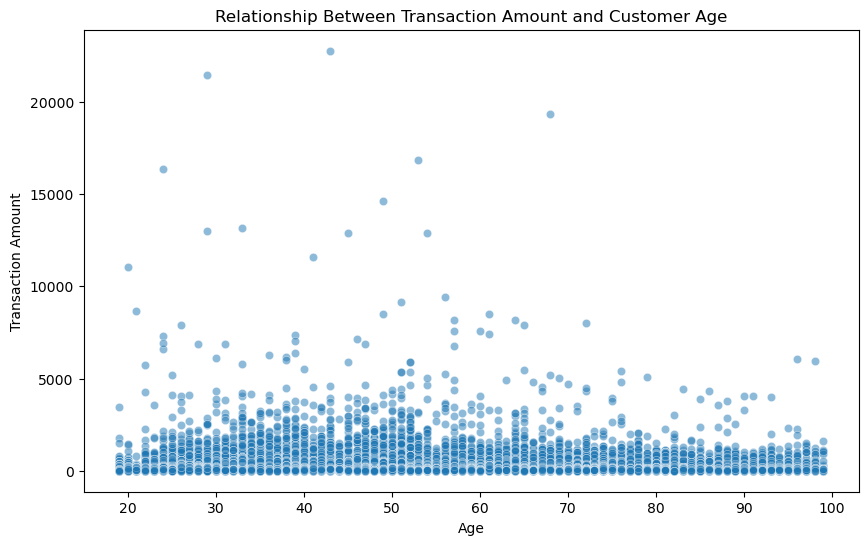

In [29]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='amt', data=df1, alpha=0.5)
plt.title('Relationship Between Transaction Amount and Customer Age')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.show()

### Question 7: Distribution of transaction amounts by day of the week

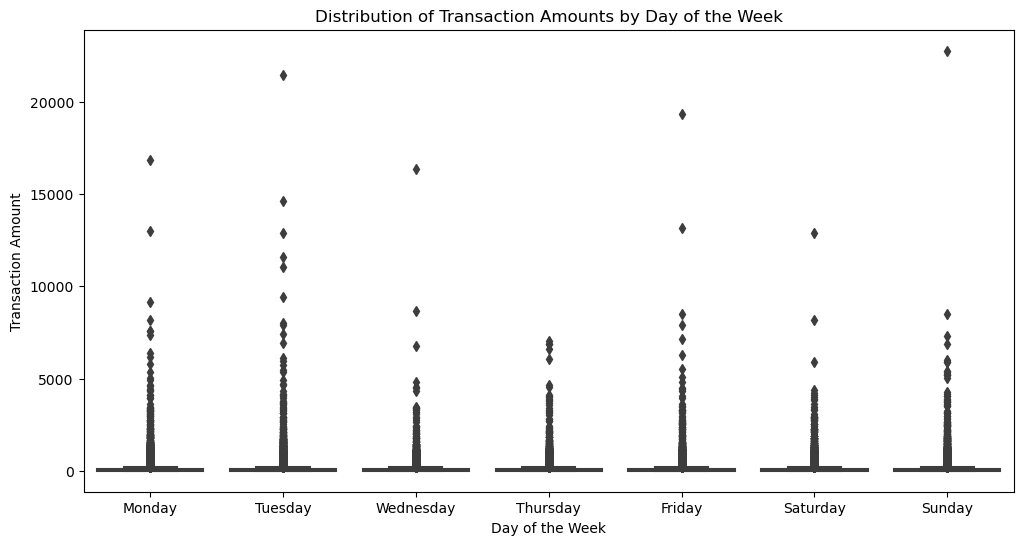

In [31]:

# Extract day of the week from transaction date
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='amt', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Transaction Amounts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Amount')
plt.show()

### Question 8: Top merchants in terms of transaction volume

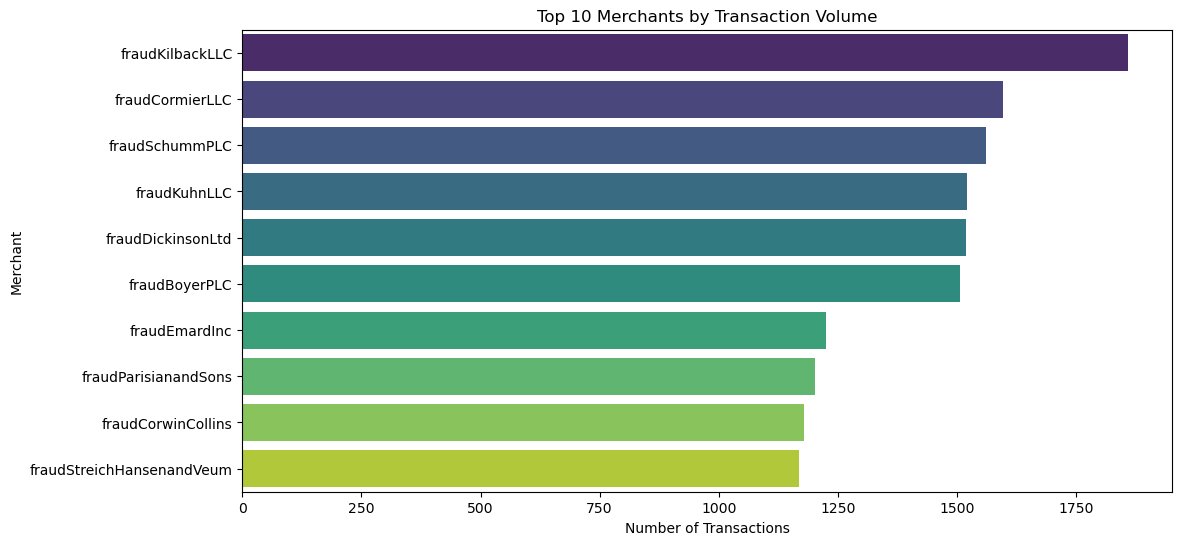

In [32]:

plt.figure(figsize=(12, 6))
top_merchants = df1['merchant'].value_counts().head(10)
sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='viridis')
plt.title('Top 10 Merchants by Transaction Volume')
plt.xlabel('Number of Transactions')
plt.ylabel('Merchant')
plt.show()